Datasets:

1. [IAPR TC-12](http://www-i6.informatik.rwth-aachen.de/imageclef/resources/iaprtc12.tgz)

2. [Flickr8K](https://github.com/jbrownlee/Datasets/releases/download/Flickr8k/Flickr8k_Dataset.zip)

3. [Flickr30](https://www.kaggle.com/datasets/hsankesara/flickr-image-dataset)

4. [MS COCO](https://cocodataset.org/#download)

In [1]:
!wget http://www-i6.informatik.rwth-aachen.de/imageclef/resources/iaprtc12.tgz
!tar -xvf iaprtc12.tgz

--2024-05-14 12:18:41--  http://www-i6.informatik.rwth-aachen.de/imageclef/resources/iaprtc12.tgz
Resolving www-i6.informatik.rwth-aachen.de (www-i6.informatik.rwth-aachen.de)... 137.226.36.140
Connecting to www-i6.informatik.rwth-aachen.de (www-i6.informatik.rwth-aachen.de)|137.226.36.140|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1764963259 (1.6G) [application/x-tar]
Saving to: 'iaprtc12.tgz'

iaprtc12.tgz        100%[===================>]   1.64G  21.8MB/s    in 80s     

2024-05-14 12:20:01 (21.0 MB/s) - 'iaprtc12.tgz' saved [1764963259/1764963259]

iaprtc12/
iaprtc12/annotations/
iaprtc12/annotations/00/
iaprtc12/annotations/00/112.eng
iaprtc12/annotations/00/116.eng
iaprtc12/annotations/00/25.eng
iaprtc12/annotations/00/26.eng
iaprtc12/annotations/00/28.eng
iaprtc12/annotations/00/32.eng
iaprtc12/annotations/00/33.eng
iaprtc12/annotations/00/35.eng
iaprtc12/annotations/00/38.eng
iaprtc12/annotations/00/40.eng
iaprtc12/annotations/00/42.eng
iaprtc12/a

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import xml.etree.ElementTree as ET
import torch
!pip install pytorch_lightning
import pytorch_lightning as pl
import math
from transformers import AutoTokenizer
from torchvision import transforms

In [4]:
def extract_description(xml_file):
    # Parse the XML file
    try:
      tree = ET.parse(xml_file)
    except Exception as e:
      print(f"error in parsing tree - {xml_file}", e)
      return None

    root = tree.getroot()

    # Iterate through each <DESCRIPTION> tag
    description = root.find('DESCRIPTION')
    return description

data = []

main_dir = os.getcwd()
for dir in sorted(os.listdir(os.path.join(main_dir, "iaprtc12/images"))):
  for f in sorted(os.listdir(os.path.join(main_dir, "iaprtc12/images/" + dir))):

    image_path = os.path.join(main_dir, "iaprtc12/images/" + dir + "/" + f)
    annot_path = os.path.join(main_dir, "iaprtc12/annotations_complete_eng/" + dir + "/" + f.split(".")[0] + ".eng")
    ele = extract_description(annot_path)

    if ele is None:
      continue

    data.append((
        image_path,
        ele.text
    ))
print(len(data))

error in parsing tree - /kaggle/working/iaprtc12/annotations_complete_eng/00/33.eng not well-formed (invalid token): line 6, column 21
error in parsing tree - /kaggle/working/iaprtc12/annotations_complete_eng/00/35.eng not well-formed (invalid token): line 5, column 47
error in parsing tree - /kaggle/working/iaprtc12/annotations_complete_eng/00/40.eng not well-formed (invalid token): line 6, column 21
error in parsing tree - /kaggle/working/iaprtc12/annotations_complete_eng/00/42.eng not well-formed (invalid token): line 5, column 149
error in parsing tree - /kaggle/working/iaprtc12/annotations_complete_eng/00/45.eng not well-formed (invalid token): line 5, column 143
error in parsing tree - /kaggle/working/iaprtc12/annotations_complete_eng/00/47.eng not well-formed (invalid token): line 5, column 109
error in parsing tree - /kaggle/working/iaprtc12/annotations_complete_eng/00/48.eng not well-formed (invalid token): line 3, column 27
error in parsing tree - /kaggle/working/iaprtc12/ann

In [5]:
maxi = len(max(data, key = lambda x: len(x[1]))[1])
maxi

420

a dark-skinned, dark-haired girl wearing a USA pullover and red pants is standing outside; a wall made of boulders in the near background; USA jumper says "Future USA" at the front, with the Olympic rings below the letters, one sleeve shows the stars, the other one the stripes;


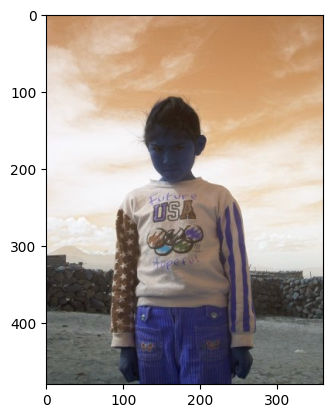

In [6]:
img_path, text = data[100]
img = cv2.imread(img_path)
plt.imshow(img)
print(text)

In [7]:
tokenizer = AutoTokenizer.from_pretrained("gpt2")
for val in tokenizer.special_tokens_map.values():
  print(val, tokenizer.vocab[val])

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

<|endoftext|> 50256
<|endoftext|> 50256
<|endoftext|> 50256


In [8]:
tokenizer.add_special_tokens({"bos_token": "<|begoftext|>", "unk_token" : "<|unknown|>", "pad_token" : "<|padding|>"})
for val in tokenizer.special_tokens_map.values():
  print(val, tokenizer.vocab[val])

ids = tokenizer("<|unknown|> <|begoftext|> I am done. <|padding|> <|endoftext|>", return_tensors = "pt", ).input_ids

print(ids.squeeze(), ids.dtype)

<|begoftext|> 50257
<|endoftext|> 50256
<|unknown|> 50258
<|padding|> 50259
tensor([50258,   220, 50257,   314,   716,  1760,    13,   220, 50259,   220,
        50256]) torch.int64


tensor([50257,    64,  3223,    12, 41412,    11,  3223,    12, 29972,  2576,
          318,  5586,   379,   257,  6915,   290,  5762,   257,  2330,  2834,
         2502,   351,   281, 32094,    26,   220, 50259, 50259, 50259, 50259,
        50259, 50259, 50259, 50259, 50259, 50259, 50259, 50259, 50259, 50259,
        50259, 50259, 50259, 50259, 50259, 50259, 50259, 50259, 50259, 50259,
        50259, 50259, 50259, 50259, 50259, 50259, 50259, 50259, 50259, 50259,
        50259, 50259, 50259, 50259, 50259, 50259, 50259, 50259, 50259, 50259,
        50259, 50259, 50259, 50259, 50259, 50259, 50259, 50259, 50259, 50259,
        50259, 50259, 50259, 50259, 50259, 50259, 50259, 50259, 50259, 50259,
        50259, 50259, 50259, 50259, 50259, 50259, 50259, 50259, 50259, 50259,
        50259, 50259, 50259, 50259, 50259, 50259, 50259, 50259, 50259, 50259,
        50259, 50259, 50259, 50259, 50259, 50259, 50259, 50259, 50259, 50259,
        50259, 50259, 50259, 50259, 50259, 50259, 50259, 50259, 

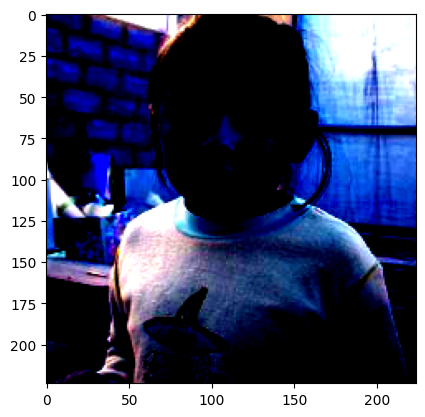

In [53]:
class CaptionDataset(torch.utils.data.Dataset):
  def __init__(self, links_array, tokenizer):
    super().__init__()
    self.links_array = links_array
    self.preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        ]
                                         )

  def __len__(self, ):
    return len(self.links_array)

  def __getitem__(self, idx):
    img_path, annot = self.links_array[idx]

    img = torch.tensor(cv2.imread(img_path) / 255.0, dtype = torch.float32).permute(2, 0, 1)
    img = self.preprocess(img)

    # img = img.astype(np.float64)
    # img = torch.tensor(img, dtype = torch.float64)

    annot_in = "<|begoftext|>" + annot
    annot_out = annot + "<|endoftext|>"

    ids_in = tokenizer(annot_in, return_tensors = "pt").input_ids.squeeze()
    ids_out = tokenizer(annot_out, return_tensors = "pt").input_ids.squeeze()

    if ids_in.shape[0] < 512:
      ids_in = torch.cat([ ids_in, torch.full((512 - ids_in.shape[0], ), fill_value = 50259, dtype = torch.int64)], axis = 0)
      ids_out = torch.cat([ ids_out, torch.full((512 - ids_out.shape[0], ), fill_value = 50259, dtype = torch.int64)], axis = 0)

    ids_out = torch.nn.functional.one_hot(ids_out, num_classes = 50260).type(torch.float32)

    return (img, ids_in), ids_out
sample_dataset = CaptionDataset(data, tokenizer)
(img, ids_in), ids_out = sample_dataset[95]
plt.imshow(img.permute(1,2, 0))


print(ids_in, ids_in.shape)
print(ids_out, ids_out.shape)

In [54]:
total = len(data)
test_size = math.floor(0.15 * total)

train_arr = data[:len(data) - 2 * test_size]
val_arr = data[len(data) - 2 * test_size:len(data) - test_size]
test_arr = data[len(data) - test_size:]

print(len(train_arr), len(val_arr), len(test_arr))

12311 2638 2638


In [55]:
train_dataset = CaptionDataset(train_arr, tokenizer)
val_dataset = CaptionDataset(val_arr, tokenizer)
test_dataset = CaptionDataset(test_arr, tokenizer)

In [50]:
class m_RNN(pl.LightningModule):
  def __init__(self, m_size, w_size, r_size, i_size, vocab_size):
    super().__init__()

    self.linear_rnn = torch.nn.Linear(
        in_features = r_size,
        out_features = w_size,
        bias = False
    )

    self.relu = torch.nn.ReLU()

    self.linear_w = torch.nn.Linear(
        in_features = w_size,
        out_features = m_size,
        bias = False
    )

    self.linear_r = torch.nn.Linear(
        in_features = r_size,
        out_features = m_size,
        bias = False
    )

    self.linear_i = torch.nn.Linear(
        in_features = i_size,
        out_features = m_size,
        bias = False
    )

    self.tanh = torch.nn.Tanh()
    
    self.final_linear = torch.nn.Linear(
        in_features = m_size,
        out_features = vocab_size,
        bias = True
    )

    self.softmax = torch.nn.Softmax(dim = 2)

  def forward(self, ws, r, img):
    ret_probs = []
    samples = ws.shape[1]
    for i in range(samples):
      r = self.relu(self.linear_rnn(r) + ws[:, i:i+1, :])

      m = 1.7159 * self.tanh(self.linear_w(ws[:, i:i+1, :]) + self.linear_r(r) + self.linear_i(img))
        
      out = self.final_linear(m)
        
      ret_probs.append(self.softmax(out))
      
    return torch.cat(ret_probs, dim = 1)


class CustomAlexnet(pl.LightningModule):
    def __init__(self, ):
        super().__init__()
        temp_model = torch.hub.load('pytorch/vision:v0.10.0', 'alexnet', pretrained=True, )
        
        self.feature_layer = temp_model.features
        self.avg_layer = temp_model.avgpool
        self.linear_layer = temp_model.classifier[:5]
        
    def forward(self, imgs):
        temp_out = self.avg_layer(self.feature_layer(imgs))
        return self.linear_layer(torch.flatten(temp_out, start_dim = 1))



class MultiModalCaptioning(pl.LightningModule):
    def __init__(self, m_size, hidden_w_size, w_size, r_size, i_size, num_classes,
                 tokenizer, test_dataset, train_dataset=None, val_dataset=None,
                 learning_rate=0.0001, batch_size=16, vocab_size=50260):
        super().__init__()
        self.m_size = m_size
        self.hidden_w_size = hidden_w_size
        self.w_size = w_size
        self.r_size = r_size
        self.i_size = i_size

        self.tokenizer = tokenizer

        self.train_dataset = train_dataset
        self.val_dataset = val_dataset
        self.test_dataset = test_dataset

        self.batch_size = batch_size
        self.learning_rate = learning_rate
        self.vocab_size = vocab_size

        #------------Image Model----------------------
        self.image_model = CustomAlexnet()

        #-------------Embedding-----------------------
        self.embedding = torch.nn.Sequential(
            torch.nn.Embedding(
                self.vocab_size,
                self.hidden_w_size,
                padding_idx = self.tokenizer.vocab["<|padding|>"]
            ),
            torch.nn.Linear(
                in_features = self.hidden_w_size,
                out_features = self.w_size,
                bias = False
            )
        )

        self.rnn = m_RNN(self.m_size, self.w_size, self.r_size, self.i_size, self.vocab_size)

    def forward(self, images, ids_in):
      i = self.image_model(images)
      i = torch.unsqueeze(i, 1)

      ws = self.embedding(ids_in)

      r_init = torch.full( (ws.shape[0], 1, self.r_size), fill_value = 50259, dtype = torch.float32).to(device)

      probs = self.rnn(ws, r_init, i)

      return probs

    def training_step(self, batch, batch_idx):
        (imgs, ids_in), ids_out = batch

        # Forward pass
        outputs = self(imgs.to(device), ids_in.to(device))
        loss = torch.nn.functional.cross_entropy(outputs, ids_out.to(device))

        tensorboard_logs = {'train_loss': loss}
        # use key 'log'
        return {"loss": loss, 'log': tensorboard_logs}

    # define what happens for testing here

    def train_dataloader(self):
        # Data loader
        train_loader = torch.utils.data.DataLoader(
            dataset=self.train_dataset, batch_size=self.batch_size, shuffle=False
        )
        return train_loader

    def val_dataloader(self):
        val_loader = torch.utils.data.DataLoader(
            dataset=self.val_dataset, batch_size=self.batch_size, shuffle=False
        )
        return val_loader

    def validation_step(self, batch, batch_idx):
        (imgs, ids_in), ids_out = batch

        # Forward pass
        outputs = self(imgs.to(device), ids_in.to(device))

        loss = torch.nn.functional.cross_entropy(outputs, ids_out.to(device))

        tensorboard_logs = {'val_loss': loss}
        # use key 'log'
        return {"val_loss": loss, 'log': tensorboard_logs}

    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), lr=self.learning_rate)

In [13]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [56]:
model = MultiModalCaptioning(
    512,
    128,
    256,
    256,
    4096,
    50260,
    tokenizer,
    test_dataset = test_dataset,
    train_dataset = train_dataset,
    val_dataset = val_dataset,
    learning_rate=0.0001,
    batch_size=2,
    vocab_size=50260
    ).to(device)

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0


In [57]:
trainer = pl.Trainer(max_epochs = 2)
trainer.fit(model)

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=3` in the `DataLoader` to improve performance.


Training: |          | 0/? [00:00<?, ?it/s]

TypeError: unsupported operand type(s) for /: 'NoneType' and 'float'

In [22]:
temp_model = torch.hub.load('pytorch/vision:v0.10.0', 'alexnet', pretrained=True, )
temp_model.eval()

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [37]:
t_model = torch.nn.Sequential(
    temp_model.features,
    temp_model.avgpool
)

In [49]:
for i, batch in enumerate(model.train_dataloader()):
    print(batch[0][0].shape, batch[0][1].shape, batch[1].shape)
    
    outputs = model(batch[0][0].to(device), batch[0][1].to(device))
    print(outputs.shape)
    if i == 0:
        break

torch.Size([2, 3, 224, 224]) torch.Size([2, 512]) torch.Size([2, 512, 50260])
r -  torch.Size([2, 1, 256])
m -  torch.Size([2, 1, 512])
r -  torch.Size([2, 1, 256])
m -  torch.Size([2, 1, 512])
r -  torch.Size([2, 1, 256])
m -  torch.Size([2, 1, 512])
r -  torch.Size([2, 1, 256])
m -  torch.Size([2, 1, 512])
r -  torch.Size([2, 1, 256])
m -  torch.Size([2, 1, 512])
r -  torch.Size([2, 1, 256])
m -  torch.Size([2, 1, 512])
r -  torch.Size([2, 1, 256])
m -  torch.Size([2, 1, 512])
r -  torch.Size([2, 1, 256])
m -  torch.Size([2, 1, 512])
r -  torch.Size([2, 1, 256])
m -  torch.Size([2, 1, 512])
r -  torch.Size([2, 1, 256])
m -  torch.Size([2, 1, 512])
r -  torch.Size([2, 1, 256])
m -  torch.Size([2, 1, 512])
r -  torch.Size([2, 1, 256])
m -  torch.Size([2, 1, 512])
r -  torch.Size([2, 1, 256])
m -  torch.Size([2, 1, 512])
r -  torch.Size([2, 1, 256])
m -  torch.Size([2, 1, 512])
r -  torch.Size([2, 1, 256])
m -  torch.Size([2, 1, 512])
r -  torch.Size([2, 1, 256])
m -  torch.Size([2, 1, 

In [41]:
256 * 6 * 6

9216

In [ ]:
t_model.